In [2]:
!nvidia-smi

Fri Mar 14 05:20:28 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 570.124.03             Driver Version: 572.60         CUDA Version: 12.8     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 4050 ...    On  |   00000000:01:00.0 Off |                  N/A |
| N/A   47C    P3             12W /   67W |       0MiB /   6141MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [1]:
%%time
import cudf

all_train = cudf.read_csv("all_train.csv")
display(all_train.head())
display(all_train.shape)


,# label,f0,f1,f2,f3,f4,f5,f6,f7,f8,...,f18,f19,f20,f21,f22,f23,f24,f25,f26,mass
0,1.0,-0.346368,0.416306,0.999236,0.475342,0.427493,-0.005984,1.989833,0.344530,1.566297,...,4.105282,0.267826,0.378718,1.743123,3.406367,4.350537,-0.352571,1.130032,2.227706,1000.0
1,1.0,1.708236,-0.319394,-1.241873,-0.887231,-0.871906,-0.005984,-0.001047,-1.038225,0.655748,...,-1.178141,-0.877361,-1.483769,-0.573682,-1.693781,-0.545062,-0.299118,-0.662942,-0.193019,750.0
2,0.0,-0.360693,1.794174,0.264738,-0.472273,-0.292344,-1.054221,-1.150495,1.423404,1.270098,...,-1.199511,0.539020,-1.590629,-0.573682,-0.543636,-0.937456,-0.300344,-0.523262,-1.506304,750.0
3,1.0,-0.377914,-0.103932,-0.649434,-2.125015,-1.643797,-0.005984,1.011112,-1.040340,-0.541991,...,0.463763,-0.006583,1.089122,-0.573682,-0.276348,-0.409272,-0.349926,-0.307123,0.529698,1250.0
4,0.0,-0.067436,-0.636762,-0.620166,-0.062551,1.588715,-0.005984,-0.595304,-1.238987,0.336844,...,-0.552837,-1.418494,-0.562982,1.743123,0.881802,0.002516,1.560950,-0.150760,-1.023889,750.0


(7000000, 29)

CPU times: user 25 s, sys: 1.93 s, total: 27 s
Wall time: 28.8 s


In [2]:
%%time
import cudf

all_test = cudf.read_csv("all_test.csv")
display(all_test.head())
display(all_test.shape)


,# label,f0,f1,f2,f3,f4,f5,f6,f7,f8,...,f18,f19,f20,f21,f22,f23,f24,f25,f26,mass
0,0.0,0.094394,0.012756,0.911933,-0.090831,-0.233575,-1.054221,-0.975937,-1.067278,-0.613850,...,-1.376865,0.067591,1.372576,-0.573682,-1.368692,-0.479379,1.529256,-0.575782,-1.290232,499.999969
1,1.0,0.327200,-0.239554,-1.592038,-2.324984,-0.507093,1.574625,-1.050106,0.968664,1.312387,...,-0.333943,1.058411,0.436482,-0.573682,-0.021727,-0.579184,-0.326044,-0.202462,-0.458558,750.000000
2,1.0,1.435010,0.400359,0.260659,0.829901,0.453934,-1.054221,1.169220,-0.541082,-1.230714,...,-1.654498,0.928221,0.639820,-0.573682,0.494222,-0.277551,-0.342811,1.774911,0.305253,1000.000000
3,0.0,-1.186220,0.443335,0.003997,0.484752,-1.159905,-1.054221,-1.581964,-0.391629,0.529644,...,-0.520804,-1.241476,-0.137923,-0.573682,-0.254372,-0.253829,0.333148,-0.554347,-0.905452,1000.000000
4,1.0,0.392461,-0.515250,-1.336984,1.895459,-1.068731,-0.005984,1.404694,0.176146,0.700568,...,-0.557441,0.838925,-0.128199,-0.573682,-0.629632,-0.673854,-0.238945,2.118990,0.938224,1250.000000


(3500000, 29)

CPU times: user 4.08 s, sys: 731 ms, total: 4.81 s
Wall time: 10.1 s


# PCA without Scaling

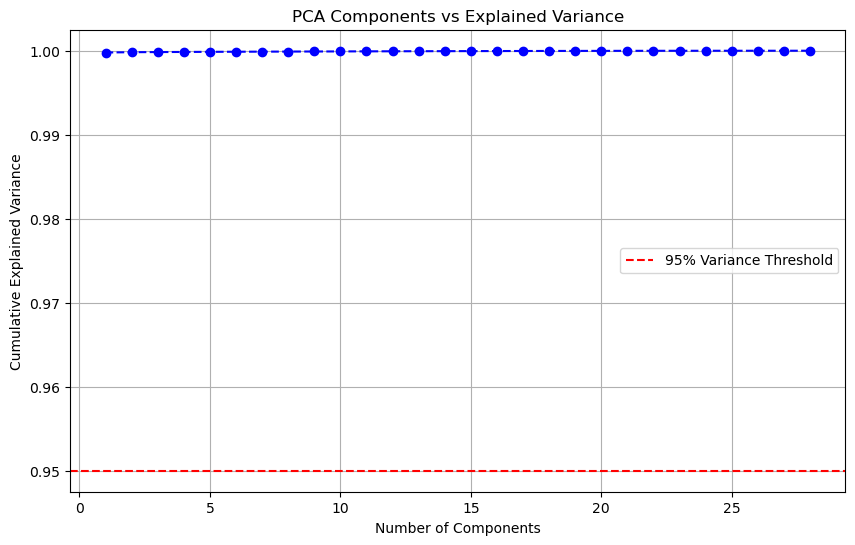

Optimal number of components: 1
Variance retained: 99.98%


'Explained Variance Ratios:'

0    0.999788
dtype: float64

'PCA Transformed Training Data:'

,0,# label
0,-0.095724,1.0
1,-250.108354,1.0
2,-250.112100,0.0
3,249.892981,1.0
4,-250.108892,0.0


'PCA Transformed Test Data:'

,0,# label
0,-500.110389,0.0
1,-250.110387,1.0
2,-0.105539,1.0
3,-0.111987,0.0
4,249.897643,1.0


CPU times: user 4.24 s, sys: 46.7 ms, total: 4.29 s
Wall time: 7.06 s


In [9]:
%%time
from cuml import PCA
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display

# Define label column name
label_col = '# label'

# Separate features and labels
X_train = all_train.drop(label_col, axis=1)
y_train = all_train[label_col]
X_test = all_test.drop(label_col, axis=1)
y_test = all_test[label_col]

# Fit PCA with maximum components
max_components = min(X_train.shape[0], X_train.shape[1])
pca = PCA(n_components=max_components, output_type='cudf')
pca.fit(X_train)

# Calculate cumulative explained variance
explained_variance = pca.explained_variance_ratio_.values_host  # Convert to numpy array
cumulative_variance = np.cumsum(explained_variance)

# Plot explained variance
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance)+1), cumulative_variance, 
         marker='o', linestyle='--', color='blue')
plt.axhline(y=0.95, color='r', linestyle='--', label='95% Variance Threshold')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA Components vs Explained Variance')
plt.legend()
plt.grid(True)
plt.show()

# Find optimal components for 95% variance retention
threshold = 0.95
optimal_n = np.argmax(cumulative_variance >= threshold) + 1  # +1 for 1-based indexing
print(f"Optimal number of components: {optimal_n}")
print(f"Variance retained: {cumulative_variance[optimal_n-1]:.2%}")

# Re-fit and transform with optimal components
final_pca = PCA(n_components=optimal_n, output_type='cudf')
final_pca.fit(X_train)
X_train_pca = final_pca.transform(X_train)
X_test_pca = final_pca.transform(X_test)

# If only one component is returned as a Series, convert it to a DataFrame
if optimal_n == 1:
    X_train_pca = X_train_pca.to_frame()
    X_test_pca = X_test_pca.to_frame()

# Create final DataFrames with labels
train_pca_df = X_train_pca.copy()
train_pca_df[label_col] = y_train.reset_index(drop=True)

test_pca_df = X_test_pca.copy()
test_pca_df[label_col] = y_test.reset_index(drop=True)

# Display results
display("Explained Variance Ratios:", final_pca.explained_variance_ratio_)
display("PCA Transformed Training Data:", train_pca_df.head())
display("PCA Transformed Test Data:", test_pca_df.head())


# PCA with Standard Scaling  

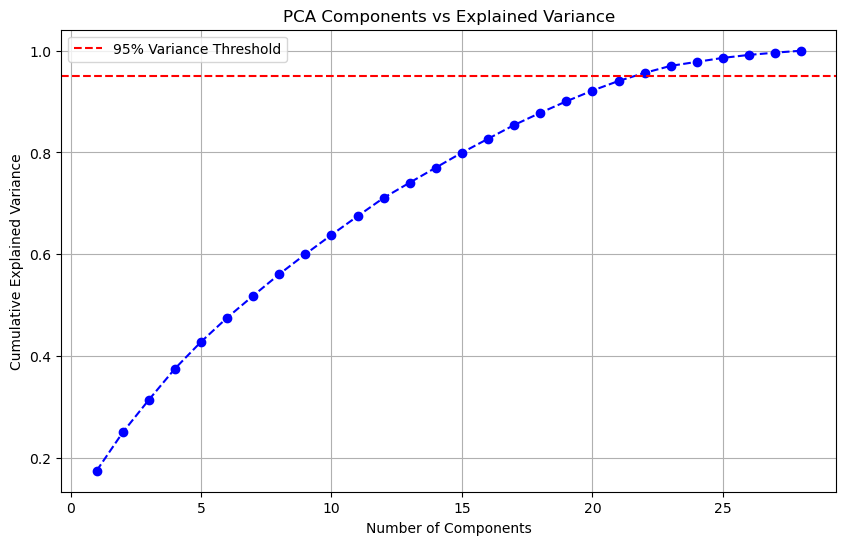

Optimal number of components: 22
Variance retained: 95.64%


MemoryError: std::bad_alloc: out_of_memory: CUDA error at: /home/di/miniconda3/envs/rapids-25.02/include/rmm/mr/device/cuda_memory_resource.hpp

In [6]:
%%time
from cuml import PCA
from cuml.preprocessing import StandardScaler  # Import the StandardScaler from cuML
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display

# Separate features and labels
X_train = all_train.drop('# label', axis=1)
y_train = all_train['# label']
X_test = all_test.drop('# label', axis=1)
y_test = all_test['# label']

# Standard scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Fit PCA with maximum components on scaled data
max_components = min(X_train_scaled.shape[0], X_train_scaled.shape[1])
pca = PCA(n_components=max_components, output_type='cudf')
pca.fit(X_train_scaled)

# Calculate cumulative explained variance
explained_variance = pca.explained_variance_ratio_.values_host  # Convert to numpy
cumulative_variance = np.cumsum(explained_variance)

# Plot explained variance
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance)+1), cumulative_variance, 
         marker='o', linestyle='--', color='blue')
plt.axhline(y=0.95, color='r', linestyle='--', label='95% Variance Threshold')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA Components vs Explained Variance')
plt.legend()
plt.grid(True)
plt.show()

# Find optimal components for 95% variance retention
threshold = 0.95
optimal_n = np.argmax(cumulative_variance >= threshold) + 1  # +1 for 1-based indexing
print(f"Optimal number of components: {optimal_n}")
print(f"Variance retained: {cumulative_variance[optimal_n-1]:.2%}")

# Re-fit and transform with optimal components on scaled data
final_pca = PCA(n_components=optimal_n, output_type='cudf')
final_pca.fit(X_train_scaled)
X_train_pca = final_pca.transform(X_train_scaled)
X_test_pca = final_pca.transform(X_test_scaled)

# Create final DataFrames with labels
train_pca_df = X_train_pca.copy()
train_pca_df['# label'] = y_train.reset_index(drop=True)
test_pca_df = X_test_pca.copy()
test_pca_df['# label'] = y_test.reset_index(drop=True)

# Display results
display("Explained Variance Ratios:", final_pca.explained_variance_ratio_)
display("PCA Transformed Training Data:", train_pca_df.head())
display("PCA Transformed Test Data:", test_pca_df.head())


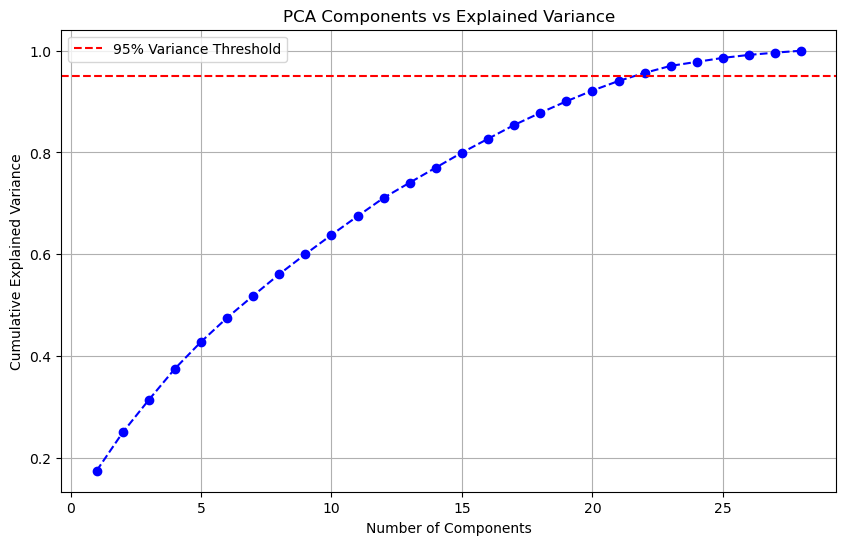

Optimal number of components: 22
Variance retained: 95.64%


MemoryError: std::bad_alloc: out_of_memory: CUDA error at: /home/di/miniconda3/envs/rapids-25.02/include/rmm/mr/device/cuda_memory_resource.hpp

In [10]:
%%time
from cuml import PCA
from cuml.preprocessing import StandardScaler  # Import the StandardScaler from cuML
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display

# Define label column name
label_col = '# label'

# Separate features and labels
X_train = all_train.drop(label_col, axis=1)
y_train = all_train[label_col]
X_test = all_test.drop(label_col, axis=1)
y_test = all_test[label_col]

# Standard scaling on training and test data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Fit PCA with maximum components on scaled data
max_components = min(X_train_scaled.shape[0], X_train_scaled.shape[1])
pca = PCA(n_components=max_components, output_type='cudf')
pca.fit(X_train_scaled)

# Calculate cumulative explained variance
explained_variance = pca.explained_variance_ratio_.values_host  # Convert to numpy array
cumulative_variance = np.cumsum(explained_variance)

# Plot explained variance
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance)+1), cumulative_variance, 
         marker='o', linestyle='--', color='blue')
plt.axhline(y=0.95, color='r', linestyle='--', label='95% Variance Threshold')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA Components vs Explained Variance')
plt.legend()
plt.grid(True)
plt.show()

# Find optimal components for 95% variance retention
threshold = 0.95
optimal_n = np.argmax(cumulative_variance >= threshold) + 1  # +1 for 1-based indexing
print(f"Optimal number of components: {optimal_n}")
print(f"Variance retained: {cumulative_variance[optimal_n-1]:.2%}")

# Re-fit and transform with optimal components on scaled data
final_pca = PCA(n_components=optimal_n, output_type='cudf')
final_pca.fit(X_train_scaled)
X_train_pca = final_pca.transform(X_train_scaled)
X_test_pca = final_pca.transform(X_test_scaled)

# When only one component is returned as a Series, convert it to a DataFrame
if optimal_n == 1:
    X_train_pca = X_train_pca.to_frame()
    X_test_pca = X_test_pca.to_frame()

# Create final DataFrames with labels
train_pca_df = X_train_pca.copy()
train_pca_df[label_col] = y_train.reset_index(drop=True)

test_pca_df = X_test_pca.copy()
test_pca_df[label_col] = y_test.reset_index(drop=True)

# Display results
display("Explained Variance Ratios:", final_pca.explained_variance_ratio_)
display("PCA Transformed Training Data:", train_pca_df.head())
display("PCA Transformed Test Data:", test_pca_df.head())


'Principal Components:'

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,0.000360,-1.423876e-07,4.770745e-07,0.000573,6.521739e-09,0.000183,0.000866,-1.938028e-07,0.000002,0.000158,...,0.000332,-6.724678e-07,-7.834031e-07,-0.000082,0.000164,0.000442,0.000147,0.000707,0.000899,0.999998
1,-0.157009,-5.073117e-04,1.222920e-04,-0.212297,-9.797292e-05,-0.162314,-0.382532,-4.828304e-04,-0.000161,0.043168,...,-0.321811,-1.949356e-04,-1.123711e-04,-0.039747,-0.197664,-0.273876,-0.098793,-0.257593,-0.403264,0.001802


'Explained Variance Ratio:'

0    0.999788
1    0.000034
dtype: float64

'Transformed Training Data (First 5 Rows):'

,0,1,# label
0,-0.095724,-7.355219,1.0
1,-250.108354,0.639588,1.0
2,-250.112100,2.405058,0.0
3,249.892981,0.033867,1.0
4,-250.108892,0.203114,0.0


'Transformed Test Data (First 5 Rows):'

,0,1,# label
0,-500.110389,1.614034,0.0
1,-250.110387,1.326763,1.0
2,-0.105539,0.075982,1.0
3,-0.111987,2.328006,0.0
4,249.897643,-1.839672,1.0


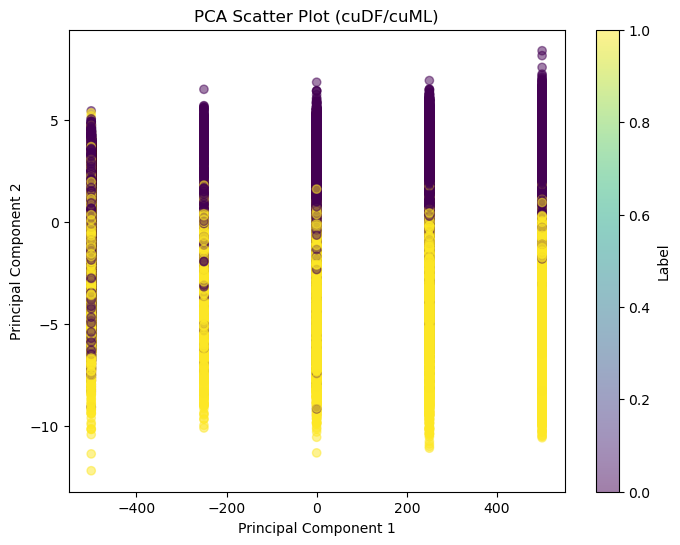

CPU times: user 1min 13s, sys: 908 ms, total: 1min 14s
Wall time: 1min 13s


In [7]:
%%time
# Import PCA from cuML
from cuml import PCA
from IPython.display import display

# Separate features and target variable for both training and test datasets
X_train = all_train.drop('# label', axis=1)
y_train = all_train['# label']

X_test = all_test.drop('# label', axis=1)
y_test = all_test['# label']

# Initialize PCA model with 2 components (adjust n_components as needed)
pca = PCA(n_components=2, output_type='cudf')

# Fit PCA on the training features
pca.fit(X_train)

# Transform both training and test data
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

# (Optional) Combine transformed features with labels for downstream tasks
# Safe: Create copies before adding labels to avoid label leaks
train_pca_df = X_train_pca.copy()
train_pca_df['# label'] = y_train.reset_index(drop=True)

test_pca_df = X_test_pca.copy()
test_pca_df['# label'] = y_test.reset_index(drop=True)

# Inspect results
display("Principal Components:", pca.components_)
display("Explained Variance Ratio:", pca.explained_variance_ratio_)
display("Transformed Training Data (First 5 Rows):", train_pca_df.head())
display("Transformed Test Data (First 5 Rows):", test_pca_df.head())

# Convert GPU data to Pandas for visualization (matplotlib requires CPU data)
X_train_pca_pd = X_train_pca.to_pandas()
y_train_pd = y_train.to_pandas().reset_index(drop=True)

# Plot (same as before)
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_train_pca_pd[0], X_train_pca_pd[1], 
                      c=y_train_pd, cmap='viridis', alpha=0.5)
plt.title("PCA Scatter Plot (cuDF/cuML)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar(scatter, label='Label')
plt.show()